In [1]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx

from functions import *

#plotting
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 22})

This directed network contains observed grooming episodes between free ranging rhesus macaques (Macaca mulatta) in Cayo Santiago during a two month period in 1963. Cayo Santiago is an island off the coast of Puerto Rico, also known as Isla de los monos (Island of the monkeys). A node represents a monkey and a directed edge A → B denotes that the rhesus macaque A groomed rhesus macaque B. The integer edge weights indicate how often this behaviour was observed.

In [5]:
RM = nx.read_weighted_edgelist('./networks/moreno_rhesus/out.moreno_rhesus_rhesus', 
                               comments='%', create_using=nx.DiGraph)

/tmp/ipykernel_21109/3168154972.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(RM); A = A.toarray()


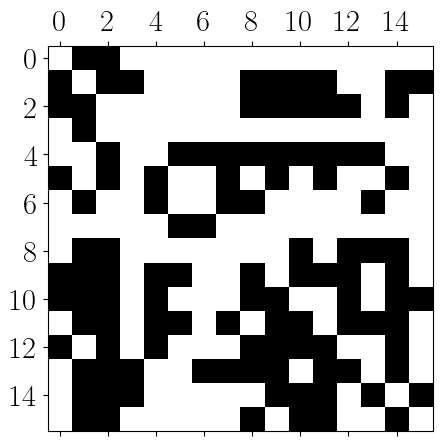

In [6]:
# retrieve adjacency matrix
A = nx.adjacency_matrix(RM); A = A.toarray()

# visualising
plt.figure(figsize=(5,5))
plt.spy(A)

In [7]:
# "unweight" network
#for i in range(len(A)):
#    for j in range(len(A)):
#        if A[i,j] > 0:
#            A[i,j] = 1
print(A)

[[ 0.  3.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [49.  0. 41.  3.  0.  0.  0.  0.  3.  2.  1.  6.  0.  0.  9.  1.]
 [25.  8.  0.  0.  0.  0.  0.  0.  5.  1.  9.  2.  2.  0. 21.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  2.  0.  0. 15.  8.  2.  1.  9.  3.  1.  4.  2.  0.  0.]
 [17.  0.  1.  0.  5.  0.  0.  8.  0.  4.  0.  3.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  5.  0.  0.  2.  2.  0.  0.  0.  0. 11.  0.  0.]
 [ 0.  0.  0.  0.  0. 11.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  4.  6.  0.  0.  0.  0.  0.  0.  0.  4.  0.  2.  6.  1.  0.]
 [ 1.  4.  4.  0.  5.  3.  0.  0.  2.  0.  8.  5. 16.  0. 11.  0.]
 [ 5.  9.  7.  0.  1.  0.  0.  0.  4.  1.  0.  0.  1.  0. 10.  5.]
 [ 0.  3. 24.  0.  2.  1.  0.  3.  0.  4.  5.  0.  2.  1. 25.  0.]
 [ 1.  0.  9.  0.  2.  0.  0.  0.  2. 21.  3.  4.  0.  0.  5.  0.]
 [ 0.  1.  1.  3.  0.  0.  1.  1.  8.  1.  0.  5.  1.  0.  2.  0.]
 [ 0.  6. 23.  1.  0.  0.  0.  0.  0.  4. 13.  2.  0.  1.  0. 

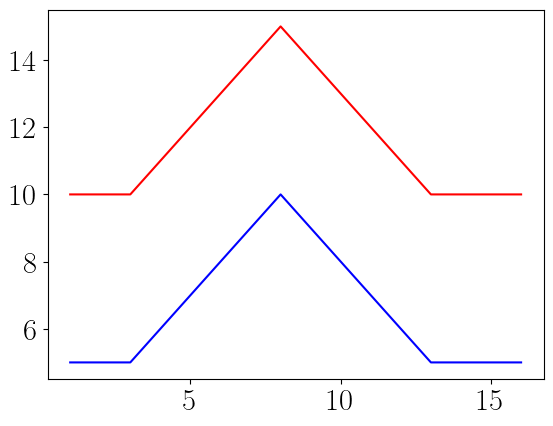

In [8]:
# Setup
nodes = np.arange(1,len(RM)+1)

# Brusselator parameters
#D = [1, 7]
#wave1 = 1 + 0.9*np.sin(nodes)
#wave2 = 2 - wave1

# Mimura-Murray parameters
D = [1, 0.0125]
wave1 = np.maximum(5, 10 - np.abs(nodes - len(RM)/2))
wave2 = wave1 + 5

# Fitzhugh-Nagumo parameters
#D = [0.2, 15]
#wave1 = 0.08 + 0.02*np.sin(nodes)
#wave2 = 0.16 - wave1

init = np.hstack(( wave1, wave2 ))
tspan = np.arange(0,20,0.01)
plt.plot(nodes,wave1,'b')
plt.plot(nodes,wave2,'r')

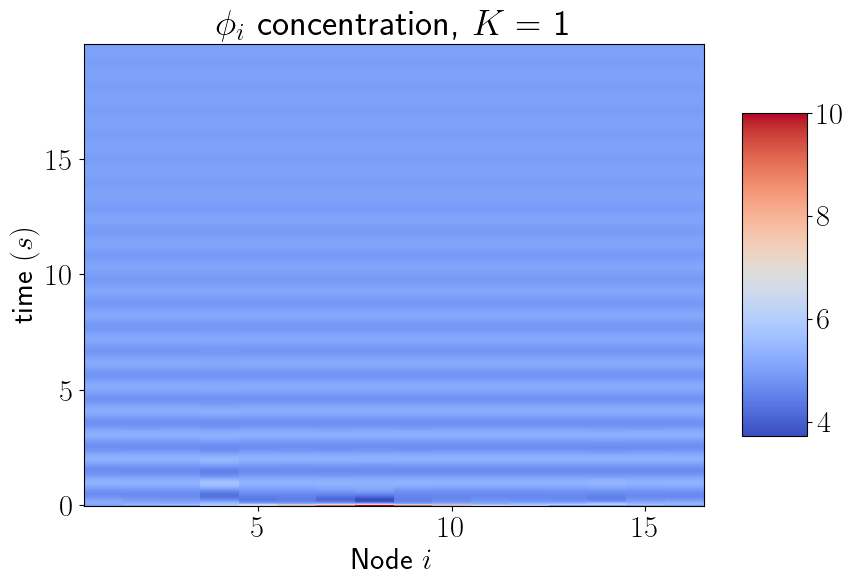

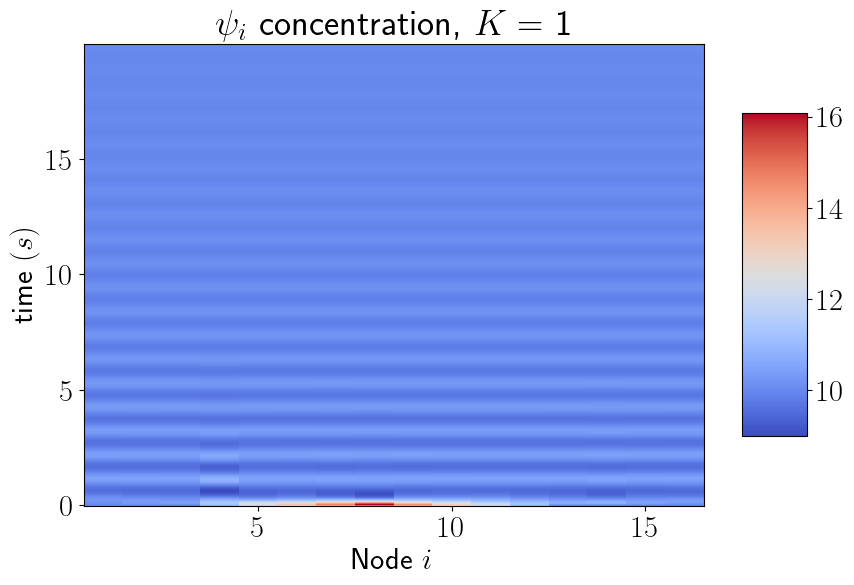

In [9]:
# simulating
sol = simulate_rdm(A, MimuraMurray, D, init, tspan, 1)